In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "copulagan"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.103507,-0.044642,0.109468,-0.052237,-0.020621,-0.006694,-0.001556,-0.047479,0.006383,0.064044,88.0
1,0.037665,-0.044642,-0.015291,-0.041520,-0.068870,0.030412,0.050493,0.068765,-0.017035,0.022798,105.0
2,0.033068,0.050680,-0.056509,0.089364,0.023218,0.080218,0.117065,0.010300,-0.001208,-0.111489,35.0
3,0.070902,0.050680,-0.021923,0.102090,-0.047124,-0.019218,0.015629,-0.005269,-0.047327,-0.059505,48.0
4,0.110727,0.050680,-0.020120,0.090793,-0.114258,-0.073725,0.082398,0.118045,0.086961,0.103840,282.0
5,0.055561,0.050680,0.079759,0.051608,-0.069373,-0.038639,0.162610,-0.007954,0.000752,-0.137767,102.0
6,0.027542,-0.044642,-0.027076,0.036810,-0.075665,0.064813,0.164053,-0.010984,-0.006448,-0.020497,79.0
7,-0.016504,0.050680,-0.001483,-0.015304,-0.114973,0.041105,0.066670,-0.007102,0.068882,0.021784,120.0
8,-0.044876,-0.044642,-0.064591,-0.044945,-0.104119,0.115255,0.028649,-0.039759,-0.068815,-0.032555,139.0
9,-0.082410,-0.044642,0.129492,0.036944,-0.011234,0.015343,0.087304,0.002500,-0.102481,-0.002735,105.0


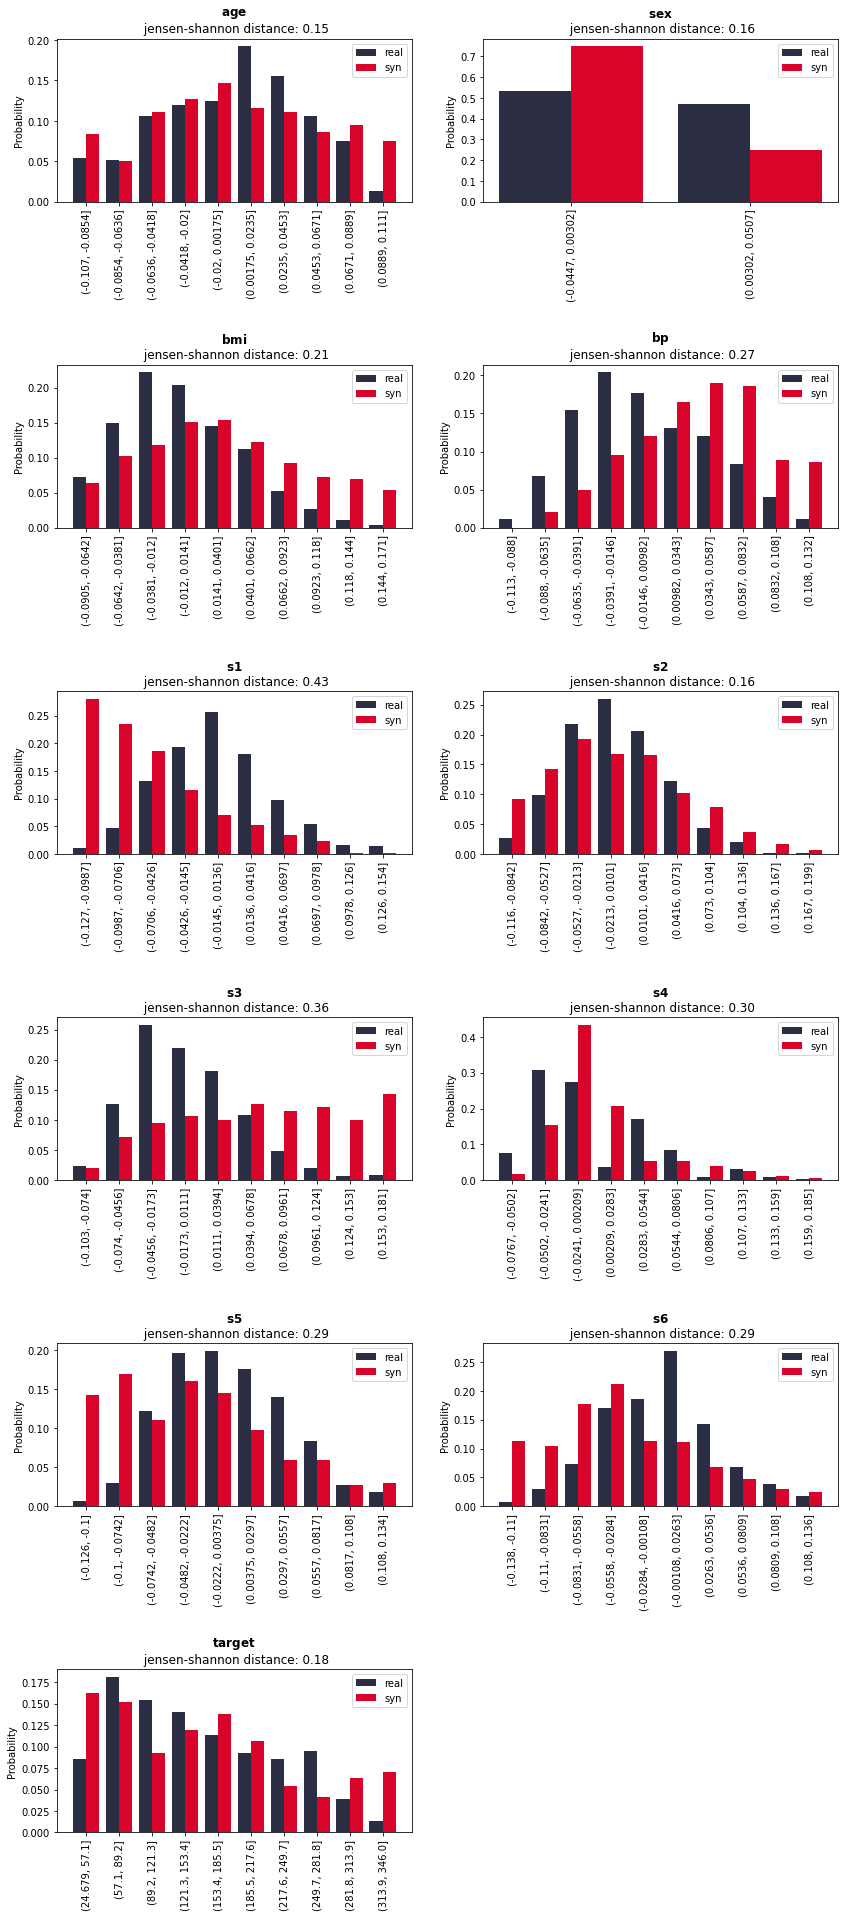

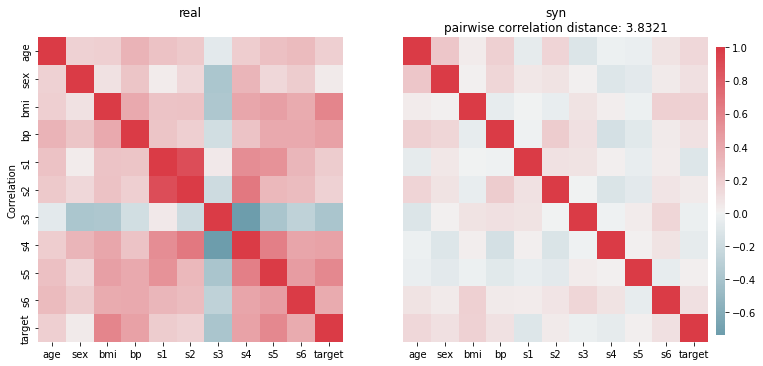

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : copulagan


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.01
sanity.avg_distance_nearest_neighbor,0.056091,0.178254,0.11174,0.050461,0.100876,0.061082,3,0,0.01
sanity.inlier_probability,0.746606,0.947964,0.870287,0.088406,0.91629,0.100679,3,0,0.01
sanity.outlier_probability,0.002262,0.020362,0.00905,0.008052,0.004525,0.00905,3,0,0.01
statistical.inverse_kl_divergence,0.793755,0.830995,0.814958,0.015636,0.820123,0.01862,3,0,0.01
statistical.kolmogorov_smirnov_test,0.721308,0.763677,0.746469,0.018188,0.754422,0.021185,3,0,0.01
statistical.chi_squared_test,0.900071,0.999488,0.958387,0.042373,0.975603,0.049709,3,0,0.03
statistical.maximum_mean_discrepancy,0.00632,0.013828,0.00958,0.003144,0.008591,0.003754,3,0,0.03
statistical.inverse_cdf_distance,1.498459,1.721234,1.630598,0.095565,1.672101,0.111388,3,0,7.09



[23:05:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
